## 1. `Case Study Overview`
=================================

### [1](#1.-Case-Study-Overview).1 Introduction:

<p style='text-align: justify;'>
A US-based housing company named <b>Surprise Housing</b> has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
</p>

### <ins>[1](#1.-Case-Study-Overview).2 Business Understanding:</ins>

<p style='text-align: justify;'>
The company is looking at prospective properties to buy to enter the market. The task is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
</p>

### <ins>[1](#1.-Case-Study-Overview).3 Business Usecase:</ins>

The company wants to understand:
+ Which variables are significant in predicting the price of a house, and
+ How well those variables describe the price of a house.

Along with the above details, determine the optimal value of `lambda` for `ridge` and `lasso` regression.

### <ins>[1](#1.-Case-Study-Overview).4 Software requirements:</ins>

<p style="text-align:justify">
This case study uses `Python 3.10` version and is designed to be compatible with versions greater than '3.6'. It is highly recommended that you use the `Anaconda` distribution to install Python, since the distribution includes all necessary Python libraries as well as Jupyter Notebooks. The following libraries are expected to be used in this project:
</p>

+ NumPy
+ Pandas
+ Matplotlib
+ Seaborn
+ Math
+ Conda
+ Git
+ Jupyter Notebook

**NOTE:**

<p style="text-align:justify">An <mark>environment.yaml</mark> file is provided to install all the necessary libraries in the environment to replicate the same work flow.</p>

### <ins>[1](#1.-Case-Study-Overview).5 Business Objectives:</ins>

<p style='text-align: justify;'>
It is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
</p'>

### Import necessary libraries

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import FunctionTransformer

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# model building packages
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.lines import Line2D
from sklearn.preprocessing import LabelEncoder

### Load the dataset

In [2]:
# Import data from CSV file
file_path = 'DataSet/train.csv'

try:
    df = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    import traceback
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')

Data Load: Successful


# Data Understanding

In [3]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam   

In [4]:
numeric_columns = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

categorical_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

columns = [
    'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'
]

In [5]:
def get_statistics_of_data(df):
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame()

    # Iterate through each column in the input DataFrame
    for i, column in enumerate(df.columns):
        # Store the variable name in the summary DataFrame
        summary_df.loc[i, 'Variable'] = column

        # Record the data type of the variable
        summary_df.loc[i, 'Data Type'] = df[column].dtype

        # Count the number of missing values in the variable
        summary_df.loc[i, 'Null Count'] = df[column].isna().sum()

        # Count the number of duplicate values in the variable
        summary_df.loc[i, 'Duplicate Count'] = df[column].duplicated().sum()

        # Record the total count of non-null values in the variable
        summary_df.loc[i, 'Total Count'] = df[column].describe()['count']

        # For numerical variables, tabulate additional descriptive statistics
        if df[column].dtype in ['int64', 'float64']:
            summary_df.loc[i, 'Mean'] = df[column].describe()['mean']
            summary_df.loc[i, 'Std Dev'] = df[column].describe()['std']
            summary_df.loc[i, 'Min'] = df[column].describe()['min']
            summary_df.loc[i, '25%'] = df[column].describe()['25%']
            summary_df.loc[i, '50%'] = df[column].describe()['50%']
            summary_df.loc[i, '75%'] = df[column].describe()['75%']
            summary_df.loc[i, 'Max'] = df[column].describe()['max']
            summary_df.loc[i, 'Unique Values of numbers'] = df[column].nunique()

        # For categorical variables, tabulate unique values, most frequent value, and its frequency
        elif df[column].dtype == 'object':
            summary_df.loc[i, 'Unique Values of String'] = df[column].nunique()
            summary_df.loc[i, 'Top Value'] = df[column].describe()['top']
            summary_df.loc[i, 'Frequency'] = df[column].describe()['freq']

    return summary_df

In [6]:
dfWithStatistics = get_statistics_of_data(df)
dfWithStatistics.style

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,Id,int64,0.000000,0.000000,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000,1460.000000,nan,na,nan
1,MSSubClass,int64,0.000000,1445.000000,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000,15.000000,nan,na,nan
2,MSZoning,object,0.000000,1455.000000,1460.000000,nan,nan,nan,nan,nan,nan,nan,nan,5.000000,RL,1151.000000
3,LotFrontage,float64,259.000000,1349.000000,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000,110.000000,nan,nan,nan
4,LotArea,int64,0.000000,387.000000,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000,1073.000000,nan,nan,nan
5,Street,object,0.000000,1458.000000,1460.000000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,Pave,1454.000000
6,Alley,object,1369.000000,1457.000000,91.000000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,Grvl,50.000000
7,LotShape,object,0.000000,1456.000000,1460.000000,nan,nan,nan,nan,nan,nan,nan,nan,4.000000,Reg,925.000000
8,LandContour,object,0.000000,1456.000000,1460.000000,nan,nan,nan,nan,nan,nan,nan,nan,4.000000,Lvl,1311.000000
9,Utilities,object,0.000000,1458.000000,1460.000000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,AllPub,1459.000000


In [7]:
# Assessment Function
def assess_columns(df, columns):
    """Perform visual, programmatic assessments, and display detailed statistics for specified columns."""
    for col in columns:
        print(f"\n{'='*50}\n{'Assessment Summary for'} '{col}'\n{'='*50}")
        
        # Visual assessment
        print(f"Visual Assessment of '{col}'".center(50, '-'))
        print(f"Head:\n{df[col].head()}\n")
        print(f"Tail:\n{df[col].tail()}\n")
        print(f"Sample:\n{df[col].sample(5)}\n")

        # Programmatic assessment
        datatype = df[col].dtype
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / len(df) * 100)
        duplicate_count = df[col].duplicated().sum()

        print(f"Programmatic Assessment of '{col}'".center(50, '-'))
        print(f"Data Type: {datatype}")
        print(f"Null Count: {null_count}")
        print(f"Null Percentage: {null_percentage:.2f}%")
        print(f"Duplicate Count: {duplicate_count}\n")

        # Add check for categorical columns
        if col in categorical_columns:
            # Display additional information specific to categorical columns
            print(f"Number of Unique Categories: {df[col].nunique()}")

        # Counts of unique values
        unique_values = df[col].value_counts()
        print(f"Counts of Unique Values for '{col}':\n{unique_values}\n")

        # Descriptive Statistics
        descriptive_stats = df[col].describe().to_frame().transpose()

        # Add skewness and kurtosis for numeric columns
        if col in numeric_columns:
            descriptive_stats['Skewness'] = df[col].skew()
            descriptive_stats['Kurtosis'] = df[col].kurtosis()

        print(f"Descriptive Statistics for '{col}':\n{descriptive_stats}\n")

In [8]:
DataWithStatistics = assess_columns(df, columns)
DataWithStatistics


Assessment Summary for 'Id'
------------Visual Assessment of 'Id'-------------
Head:
0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

Tail:
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, dtype: int64

Sample:
880    881
88      89
429    430
979    980
307    308
Name: Id, dtype: int64

---------Programmatic Assessment of 'Id'----------
Data Type: int64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 0

Counts of Unique Values for 'Id':
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

Descriptive Statistics for 'Id':
     count   mean         std  min     25%    50%      75%     max
Id  1460.0  730.5  421.610009  1.0  365.75  730.5  1095.25  1460.0


Assessment Summary for 'MSSubClass'
--------Visual Assessment of 'MSSubClass'---------
Head:
0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

Tail:
1455    60
1456    2

In [9]:
#Have to drop this columns!

'Id'- we don't need that, 'Street'- we have only pave more than 95% so we can drop it, 'Alley'- we have more than 90% null value, 'Utilities'- almost all AllPub, 'MasVnrType'- it could be an important point but we don't have enough data, 'PoolArea'- almost all no are 0, 'PoolQC'- all null, 'Fence' - nc 80%, 'MiscFeature'- nc 96%, 'MiscVal', ''

In [10]:
#I think that i have to look more deep into these columns!

'MSZoning', 'LotFrontage'- have some null values, 'LotArea'- might have some outliers, 'LandContour'- looks like more dependent on Lvl, 'LotConfig',
'LandSlope', 'Condition1', 'Condition2'- more dependent on Norm, 'BldgType', 'RoofStyle', 'RoofMatl'- mostly CompShg, 'MasVnrArea', 
'ExterCond', 'BsmtCond'- have some null value, 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', 'Heating'- dependent on GasA, 'CentralAir'- d on Y, 'Electrical'- d on SBrkr, '1stFlrSF', '2ndFlrSF', 
'LowQualFinSF'- d on 0, 'BsmtHalfBath'-d on 0, 'KitchenAbvGr'- d on 1, 'Functional', 'FireplaceQu'- null 47%, 'GarageYrBlt', 'GarageFinish',
'GarageQual'- d on TA, 'GarageCond'- d on TA, 'PavedDrive', 'EnclosedPorch', '3SsnPorch'- d on 0, 'ScreenPorch'- d on 0, 'SaleType'- d on WD,
'SaleCondition', ''


In [11]:
#These columns are fine for me!

# 'MSSubClass','LotShape', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
'SalePrice', 



In [12]:
#Ploting count vs data type graph

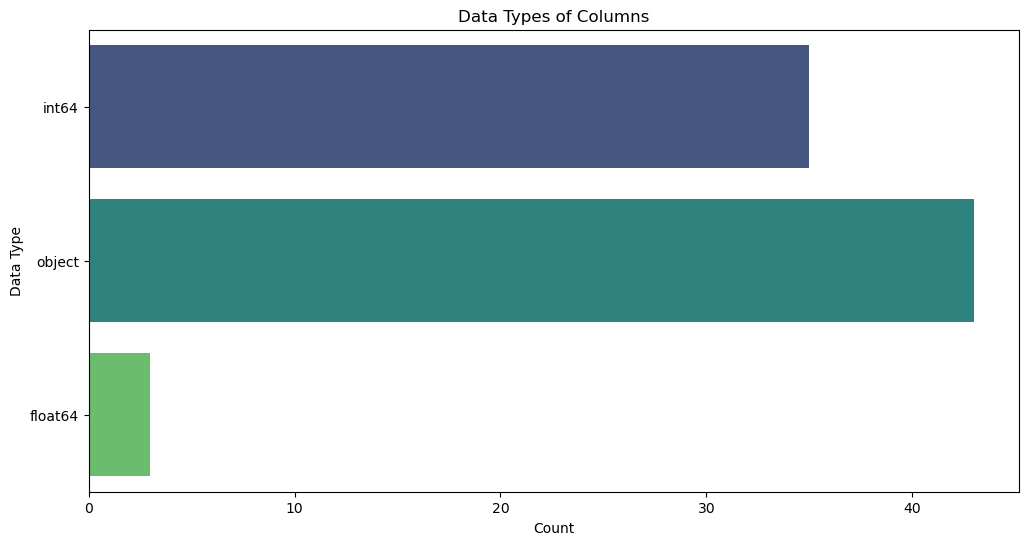

In [13]:
dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index': 'variable', 0: 'datatype'})

# Identifying numerical columns
numerical_columns = dtypes_df[dtypes_df['datatype'].isin([np.int64, np.float64])]['variable']


plt.figure(figsize=(12, 6))
sns.countplot(y=dtypes_df['datatype'], palette='viridis')
plt.title('Data Types of Columns')
plt.xlabel('Count')
plt.ylabel('Data Type')
plt.show()

### DATA CLEANING 

+ remove cols with nulls more than `70%`.

In [14]:
# Calculate the percentage of null values in each column
null_percentages = (df.isna().sum() / len(df)) * 100

# Filter columns where null percentage exceeds 70%
cols_to_drop = null_percentages[null_percentages > 70].index

# Drop columns with high null percentages
df.drop(columns=cols_to_drop, inplace=True)


In [15]:
df.shape

(1460, 77)

Highlight the variables which has percentage of null values more than 5 in the dataset:

In [16]:
# Filter variables with null counts greater than zero
null_count_df = dfWithStatistics.loc[dfWithStatistics['Null Count'] > 0, 
                                     ['Variable', 'Data Type', 'Null Count']]

# Sort by descending order of null counts
null_count_df = null_count_df.sort_values(by='Null Count', ascending=False)

# Define a function to apply styling
def highlight_null_count(row):
    if row['Null Count'] > 10:
        return ['color: red; background-color: lightyellow'] * len(row)
    else:
        return ['color: gray'] * len(row)

# Apply styling to highlight null counts
styled_null_count_df = null_count_df.style.apply(highlight_null_count, axis=1)

# Display the styled DataFrame
styled_null_count_df

,Variable,Data Type,Null Count
72,PoolQC,object,1453.000000
74,MiscFeature,object,1406.000000
6,Alley,object,1369.000000
73,Fence,object,1179.000000
25,MasVnrType,object,872.000000
57,FireplaceQu,object,690.000000
3,LotFrontage,float64,259.000000
58,GarageType,object,81.000000
59,GarageYrBlt,float64,81.000000
60,GarageFinish,object,81.000000


**Observations:**

> + `FireplaceQu` <p style='text-align: justify;'> As column pertains only 53% of data, it should be dropped from the further analysis in ideal case. It is required to explore and understand its linkage with other variables before eliminating it from the analysis.</p>
>
> + `LotFrontage`<p style='text-align: justify;'> As the missing data falls under 25% threshold value, evaluate the best value to impute the data.</p>
> + <p style='text-align: justify;'> Remaining specified columns has minor number of null values which can be ignored or dealth with in the further analysis upon requirement. It is advisable to ignore null values as imputatioin might introduce bias, change the distribution of the values, and infer the stats by altering it's true statistical significance. The missing values can also be replace based on a prediction models. Since we have good amount of data and the data loss would be really low, we can also remove the entries/rows related to these missing values.</p>

Explore `FireplaceQu` variable and understand its linkage with other variables:

In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

Given the above information and `data_description.txt` file, `FireplaceQu` variable is associated to `Fireplaces` variable.

In [18]:
df[['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
...,...,...
1455,1,TA
1456,2,TA
1457,2,Gd
1458,0,NaN


As per the `data_description.txt` file:

|variable|description|value|abbrevation|
|:-------|:----------|:----|:----------|
|Fireplaces| Number of fireplaces|||
|FireplaceQu| Fireplace quality|<ul><li>Ex<li>Gd<li>TA<li>Fa<li>Po<li>NA</ul>|<ul><li>Excellent - Exceptional Masonry Fireplace<li>Good - Masonry Fireplace in main level<li>Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<li>Fair - Prefabricated Fireplace in basement<li>Poor - Ben Franklin Stove<li>No Fireplace</ul>

Explore the unique values and their grequency in the `FireplaceQu` variable:

In [19]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

Check the relevant values in the `Fireplaces`, for null values in the `FireplaceQu` variable:

In [20]:
# count the null values in the variable
df['FireplaceQu'].isna().sum()

690

In [21]:
mask = df['FireplaceQu'].isna()
df[['Fireplaces', 'FireplaceQu']][mask]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


The above output depicts that most of the null values in the `FireplaceQu` variable reflect to zero fireplaces. Further explore the variables to confirm the statement.

List the unique values for `Fireplaces` variable for null values in `FireplaceQu`:

In [22]:
mask = df['FireplaceQu'].isna()
df['Fireplaces'][mask].value_counts()

Fireplaces
0    690
Name: count, dtype: int64

This further strengthns the previous statement, that all the null values in `FireplaceQu` variable, are associated to zero `Fireplaces`. Also, as per the `data_description.txt`, there exists a categorical value of `NA` corresponding to `No Fireplace` in `FireplaceQu` variable, which is missing. Let us confirm this statement:

Display the `Fireplaces` for `NA` values in `FireplaceQu`:

In [23]:
mask = df['FireplaceQu'] == 'NA'
df['Fireplaces'][mask].value_counts()

Series([], Name: count, dtype: int64)

Display the `FireplaceQu` for `0` values in `Fireplaces`:

In [24]:
mask = df['Fireplaces'] == '0'
df['FireplaceQu'][mask].value_counts()

Series([], Name: count, dtype: int64)

This concludes that the null values residing in the `FireplaceQu` variable can be **replaced** with categorical value of `NA`, as it represents the zero `Fireplaces`.

Impute the null values residing in the `FireplaceQu` variable with categorical value of `NA`:

In [25]:
# impute the null values in 'FireplaceQu' variable, with 'NA' value
mask = df['FireplaceQu'].isna()
df.loc[mask, 'FireplaceQu'] = 'NA'

Write a test case to confirm the operation:

In [26]:
# test case
if df['FireplaceQu'].isna().sum():
    print('WARNING: Imputation failed !')
else:
    print('Data imputation successful.')

Data imputation successful.


### Handle Null Values in the dataset by imputation

In [27]:
# Columns to exclude
redundant_cols = ['SalePrice', 'Id', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']

# Create a list of columns to keep
col_list = [col for col in df.columns if col not in redundant_cols]

# Create the new DataFrame with selected columns
df_temp = df[col_list]

# Display the column names of the new DataFrame
df_temp.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

In [28]:
# Filter continuous features
cont_feats = df_temp.select_dtypes(include=['int64', 'float64']).columns

# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
df_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(df_temp[cont_feats]), columns=cont_feats)

In [29]:
df_iter_imputed

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0
1,20.0,80.0,9600.0,6.0,8.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0
3,70.0,60.0,9550.0,7.0,5.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0
4,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0
1456,20.0,85.0,13175.0,6.0,6.0,119.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1457,70.0,66.0,9042.0,7.0,9.0,0.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,9.0,2.0,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0
1458,20.0,68.0,9717.0,5.0,6.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0


In [30]:
col_list = ['LotFrontage', 'MasVnrArea']
col_list 

['LotFrontage', 'MasVnrArea']

In [31]:
df_temp[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [32]:
df_iter_imputed[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [33]:
null_index = df_temp[df_temp['LotFrontage'].isna()]['LotFrontage'].index
null_index

Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
       ...
       1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
      dtype='int64', length=259)

In [34]:
df_iter_imputed.loc[null_index]['LotFrontage']

7       77.629702
12      64.795458
14      77.396691
16      72.589550
24      62.348692
          ...    
1429    81.567013
1431    49.555318
1441    44.662348
1443    62.667056
1446    80.022270
Name: LotFrontage, Length: 259, dtype: float64

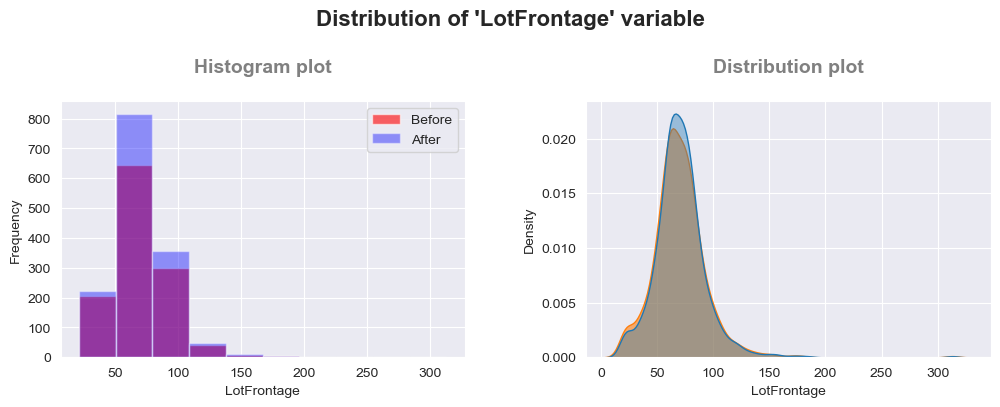

In [35]:
plt.figure(figsize=[12, 4])
sb.set_style("darkgrid")

col = 'LotFrontage'

# Plot histogram
plt.subplot(1, 2, 1)
plt.hist(df_temp[col], color='red', alpha=0.6, label='Before')
plt.hist(df_iter_imputed[col], color='blue', alpha=0.4, label='After')
plt.title('Histogram plot\n', weight='bold', color='grey', fontsize=14)
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()

# Plot distribution
plt.subplot(1, 2, 2)
sb.distplot(df_temp[col], hist=False, kde=True,
            kde_kws={'alpha': 0.6, "shade": True}, color=sb.color_palette()[1], label='Before')
sb.distplot(df_iter_imputed[col], hist=False, kde=True,
            kde_kws={'alpha': 0.4, "shade": True}, color=sb.color_palette()[0], label='After')
plt.title('Distribution plot\n', weight='bold', color='grey', fontsize=14)
plt.xlabel(col)
plt.ylabel('Density')
plt.legend()

plt.suptitle(f"Distribution of '{col}' variable", fontsize=16, weight='bold')
plt.subplots_adjust(top=0.75)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Add custom legend
custom_lines = [Line2D([0], [0], color='red', lw=2, alpha=0.6),
                Line2D([0], [0], color='blue', lw=2, alpha=0.4)]

legend1 = plt.legend(custom_lines, ['Before', 'After'], scatterpoints=1, frameon=True, fancybox=True, shadow=False,
                     ncol=1, framealpha=1, borderpad=1, borderaxespad=1, loc='upper right', labelspacing=1,
                     title='Data Imputation', title_fontsize=12, fontsize=10, facecolor='white',
                     markerfirst=True, handlelength=1, handletextpad=1, bbox_to_anchor=(1.5, 1.05))
plt.gca().add_artist(legend1)  # Add the legend back after the second legend

plt.show()

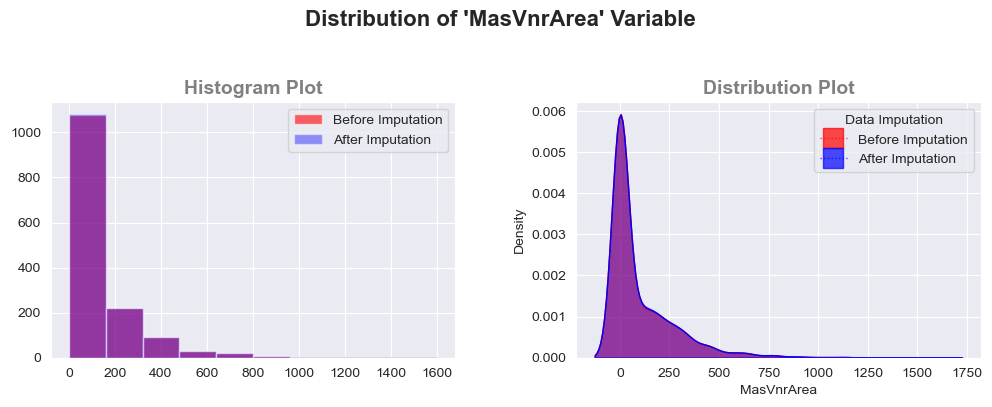

In [36]:
# Set up figure and style
plt.figure(figsize=[12, 4])
sb.set_style("darkgrid")

# Define the column of interest
col = 'MasVnrArea'

# Plot histogram
plt.subplot(1, 2, 1)
plt.hist(df_temp[col], color='red', alpha=0.6, label='Before Imputation')
plt.hist(df_iter_imputed[col], color='blue', alpha=0.4, label='After Imputation')
plt.title('Histogram Plot', weight='bold', color='grey', fontsize=14)
plt.legend()

# Plot distribution
plt.subplot(1, 2, 2)
sb.kdeplot(df_temp[col], color='red', alpha=0.6, label='Before Imputation', shade=True)
sb.kdeplot(df_iter_imputed[col], color='blue', alpha=0.4, label='After Imputation', shade=True)
plt.title('Distribution Plot', weight='bold', color='grey', fontsize=14)
plt.legend()

# Overall title
plt.suptitle(f"Distribution of '{col}' Variable", fontsize=16, weight='bold')
plt.subplots_adjust(top=0.75)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Add custom legend
custom_lines = [Line2D([0], [0], marker='s', markersize=15, color='red', linestyle=':', linewidth=1, alpha=0.7),
                Line2D([0], [0], marker='s', markersize=15, color='blue', linestyle=':', linewidth=1, alpha=0.7)]
plt.legend(custom_lines, ['Before Imputation', 'After Imputation'], loc='upper right', title='Data Imputation')

plt.show()


It is evident from the above plots that the distribution of the data is not altered much from imputing the data. Hence enforcing data imputation for null values in source data.

In [37]:
numerical_cols = []
for col in df.columns:
    if df[col].dtype == 'int64':
        numerical_cols.append(col)
        
print(numerical_cols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [38]:
# replace the columns having nulls with imputed columns 
df['LotFrontage'] = df_iter_imputed['LotFrontage']
df['MasVnrArea'] = df_iter_imputed['MasVnrArea']

Check for null values in the modified dataset:

In [39]:
# Filter variables with null counts greater than zero
null_count_df = dfWithStatistics.loc[dfWithStatistics['Null Count'] > 0, 
                                     ['Variable', 'Data Type', 'Null Count']]

# Sort by descending order of null counts
null_count_df = null_count_df.sort_values(by='Null Count', ascending=False)

# Define a function to apply styling
def highlight_null_count(row):
    if row['Null Count'] > 10:
        return ['color: red; background-color: lightyellow'] * len(row)
    else:
        return ['color: gray'] * len(row)

# Apply styling to highlight null counts
styled_null_count_df = null_count_df.style.apply(highlight_null_count, axis=1)

# Display the styled DataFrame
styled_null_count_df

,Variable,Data Type,Null Count
72,PoolQC,object,1453.000000
74,MiscFeature,object,1406.000000
6,Alley,object,1369.000000
73,Fence,object,1179.000000
25,MasVnrType,object,872.000000
57,FireplaceQu,object,690.000000
3,LotFrontage,float64,259.000000
58,GarageType,object,81.000000
59,GarageYrBlt,float64,81.000000
60,GarageFinish,object,81.000000


Understand the garage variables and its relation among them:

In [40]:
garage_col_list = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

In [41]:
mask = df['GarageType'].isna()
df[mask][garage_col_list]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


As the relevant entries has garage built year (`GarageYrBlt`) associated to null values in specified columns, the values can be categorized as `NA` (no garage) and `GarageYrBlt` as null values only (will be dealt in the further analysis).

In [42]:
mask = df['GarageYrBlt'].isna()
df.loc[mask, 'GarageType'] = 'NA'
df.loc[mask, 'GarageFinish'] = 'NA'
df.loc[mask, 'GarageQual'] = 'NA'
df.loc[mask, 'GarageCond'] = 'NA'

Since we have no information related to Basement variable and removing these from the further analysis will only pertain to small data loss, they are dropped from the dataset.

In [43]:
data_loss = round(((df['BsmtExposure'].isna().sum() / df.shape[0]) * 100), 1)
print(f"The data loss from dropping 'BsmtExposure' null entries is: '{data_loss}%'")

The data loss from dropping 'BsmtExposure' null entries is: '2.6%'


Since the remaining columns has low null value count, they can be removed from the further analysis without much data loss.

In [44]:
# drop the null entries from above specified column list
col_list = ['BsmtExposure','BsmtFinType2','BsmtQual',
            'BsmtCond','BsmtFinType1','MasVnrType','Electrical']

for col in col_list:
    drop_index = df[df[col].isna()].index
    df = df.drop(drop_index)

Check for duplicate values in the dataset

In [45]:
mask = df.duplicated()
df[mask]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


No duplicates found

### Data Quality Check:

`MSZoning` column:

In [46]:
df['MSZoning'].value_counts()

MSZoning
RL    505
RM     50
FV     24
RH      2
Name: count, dtype: int64

In the above variable, the category `C` is misspelled as `C (all)`. Retify/ rename it to appropriate value.

In [47]:
mask = df['MSZoning'] == 'C (all)'
df.loc[mask, 'MSZoning'] = 'C'

### Feature Extraction:

In [48]:
# Extract numerical information from the date variables
def calculate_age(df):
    # Calculate house age in years
    df['house_age_years'] = (df['YrSold'] - df['YearBuilt']) + df['MoSold'] / 12
    
    # Calculate house remodel age in years
    df['house_remodel_age_years'] = (df['YrSold'] - df['YearRemodAdd']) + df['MoSold'] / 12
    
    # Calculate garage age in years (replace null values with 0)
    df['garage_age_years'] = (df['YrSold'] - df['GarageYrBlt']) + df['MoSold'] / 12
    df.loc[df['GarageYrBlt'].isna(), 'garage_age_years'] = 0
    
    return df

In [49]:
# Define columns of interest
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [50]:
# Apply feature extraction
df = calculate_age(df)

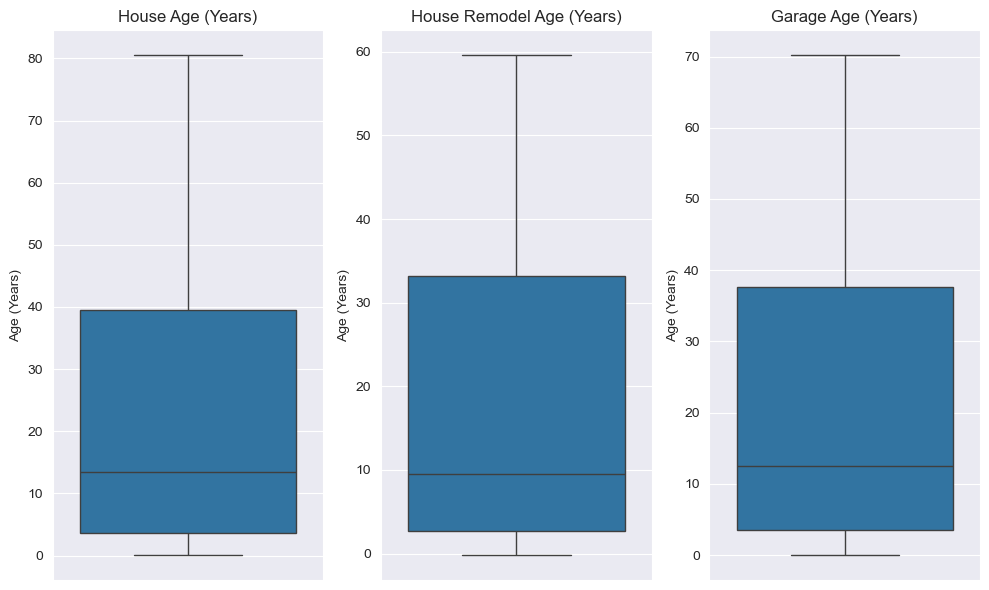

In [51]:
# Set up figure and axes
plt.figure(figsize=(10, 6))

# Create boxplot for house_age_years
plt.subplot(1, 3, 1)
sb.boxplot(y=df['house_age_years'])
plt.title('House Age (Years)')
plt.ylabel('Age (Years)')

# Create boxplot for house_remodel_age_years
plt.subplot(1, 3, 2)
sb.boxplot(y=df['house_remodel_age_years'])
plt.title('House Remodel Age (Years)')
plt.ylabel('Age (Years)')

# Create boxplot for garage_age_years
plt.subplot(1, 3, 3)
sb.boxplot(y=df['garage_age_years'])
plt.title('Garage Age (Years)')
plt.ylabel('Age (Years)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [52]:
# Drop date variables
drop_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']
df.drop(drop_cols, axis=1, inplace=True) 

In [53]:
# Confirm drop of columns
print("Remaining columns after dropping date variables:")
print(df.columns)

Remaining columns after dropping date variables:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDec

In [54]:
# Confirm absence of null values
if df.isna().sum().sum() == 0:
    print("No null values present in the dataset.")
else:
    print("Null values still present in the dataset. Please double-check.") 

No null values present in the dataset.


### Check the variables with low variance:

Identify low disperse data:

In [55]:
# Identify variables with low variance
low_var_cols = [col for col in df.columns if df[col].nunique() < 3]

In [56]:
# Print variables with low variance
print("Variables with low variance:", low_var_cols)

Variables with low variance: ['Street', 'Utilities', 'Heating', 'CentralAir', 'LowQualFinSF']


In [57]:
# Display value counts for variables with low variance
for col in low_var_cols:
    print(df[col].value_counts())

Street
Pave    579
Grvl      2
Name: count, dtype: int64
Utilities
AllPub    580
NoSeWa      1
Name: count, dtype: int64
Heating
GasA    579
GasW      2
Name: count, dtype: int64
CentralAir
Y    576
N      5
Name: count, dtype: int64
LowQualFinSF
0    581
Name: count, dtype: int64


As `Id` column is redundant in the further analysis, remove it.

As `GarageCars` potray the same information as `GarageArea` but in different metric, it can be dropped from the analysis.

In [58]:
# Remove variables with low variance
drop_cols = low_var_cols + ['Id', 'GarageCars']
df.drop(drop_cols, axis=1, inplace=True)

### Outlier Treatment:

In [59]:
def remove_outliers(df):
    # Create a deep copy of the DataFrame
    df_temp = df.copy(deep=True)
    
    # Identify numerical columns
    numerical_cols = df_temp.select_dtypes(include=['int', 'float']).columns
    
    # Iterate over numerical columns and remove outliers using IQR method
    for col in numerical_cols:
        Q1 = df_temp[col].quantile(0.25)
        Q3 = df_temp[col].quantile(0.99)
        IQR = Q3 - Q1
        mask = (df_temp[col] >= (Q1 - 1.5 * IQR)) & (df_temp[col] <= (Q3 + 1.5 * IQR))
        df_temp = df_temp[mask]
    
    return df_temp

In [60]:
# Remove outliers from the DataFrame
df_outlier_removed = remove_outliers(df)

In [61]:
# Calculate data loss
data_loss_percentage = ((df.shape[0] - df_outlier_removed.shape[0]) / df.shape[0]) * 100

In [62]:
# Print data loss percentage
print(f'Data loss after outlier removal: {round(data_loss_percentage, 1)}%')

Data loss after outlier removal: 1.2%


### Categorical data imputation:

In [63]:
# List of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [64]:
# Print the list of categorical columns
print("Categorical columns:", categorical_cols)

Categorical columns: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [65]:
# Display a sample of categorical data
categorical_sample = df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure',
                         'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
                         'GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()
print("Sample of categorical data:\n", categorical_sample)

Sample of categorical data:
   LandSlope ExterQual BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       Gtl        Gd       Gd       TA           No          GLQ   
2       Gtl        Gd       Gd       TA           Mn          GLQ   
4       Gtl        Gd       Gd       TA           Av          GLQ   
6       Gtl        Gd       Ex       TA           Av          GLQ   
7       Gtl        TA       Gd       TA           Mn          ALQ   

  BsmtFinType2 HeatingQC KitchenQual GarageFinish GarageQual GarageCond  \
0          Unf        Ex          Gd          RFn         TA         TA   
2          Unf        Ex          Gd          RFn         TA         TA   
4          Unf        Ex          Gd          RFn         TA         TA   
6          Unf        Ex          Gd          RFn         TA         TA   
7          BLQ        Ex          TA          RFn         TA         TA   

  ExterCond LotShape  
0        TA      Reg  
2        TA      IR1  
4        TA      IR1  
6        TA  

In [66]:
# Define mapping for categorical variables
categorical_mapping = {
    'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'GarageQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
}

In [67]:
# Apply mapping to categorical variables
df.replace(categorical_mapping, inplace=True)

In [68]:
# Display the updated categorical data
updated_categorical_sample = df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure',
                                 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
                                 'GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()
print("Updated categorical data:\n", updated_categorical_sample)

Updated categorical data:
    LandSlope  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          0          3         4         3             1             6   
2          0          3         4         3             2             6   
4          0          3         4         3             3             6   
6          0          3         5         3             3             6   
7          0          2         4         3             2             5   

   BsmtFinType2  HeatingQC  KitchenQual  GarageFinish  GarageQual  GarageCond  \
0             1          4            3             2           3           3   
2             1          4            3             2           3           3   
4             1          4            3             2           3           3   
6             1          4            3             2           3           3   
7             4          4            2             2           3           3   

   ExterCond  LotShape  
0         

In [69]:
# Display data types of categorical columns
print("Data types of categorical columns:\n", df[categorical_cols].dtypes)

Data types of categorical columns:
 MSZoning         object
LotShape          int64
LandContour      object
LotConfig        object
LandSlope         int64
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual         int64
ExterCond         int64
Foundation       object
BsmtQual          int64
BsmtCond          int64
BsmtExposure      int64
BsmtFinType1      int64
BsmtFinType2      int64
HeatingQC         int64
Electrical       object
KitchenQual       int64
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish      int64
GarageQual        int64
GarageCond        int64
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object


In [70]:
# Create a label encoder object
label_encoder = LabelEncoder()

categorical_cols = [
    'LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure',
                                 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
                                 'GarageFinish','GarageQual','GarageCond','ExterCond','LotShape'
]


# Iterate through each categorical column
for col in categorical_cols:
    # Encode the categorical column to numeric values
    df[col] = label_encoder.fit_transform(df[col])

# Now all categorical columns are converted to numeric type

In [71]:
# Display data types of categorical columns
print("Data types of categorical columns:\n", df[categorical_cols].dtypes)

Data types of categorical columns:
 LandSlope       int64
ExterQual       int64
BsmtQual        int64
BsmtCond        int64
BsmtExposure    int64
BsmtFinType1    int64
BsmtFinType2    int64
HeatingQC       int64
KitchenQual     int64
GarageFinish    int64
GarageQual      int64
GarageCond      int64
ExterCond       int64
LotShape        int64
dtype: object


### Exploratory data analysis:

Correlation plot:

In [72]:
# Generate correlation matrix
num_cols = []
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_cols.append(col)
        
df[num_cols].corr()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,house_age_years,house_remodel_age_years,garage_age_years
MSSubClass,1.000000,-0.520746,-0.248268,0.191962,0.002479,-0.110122,-0.090034,0.000578,-0.025535,-0.057338,-0.015673,0.030842,0.028252,0.034813,-0.156020,-0.066460,-0.079105,-0.171381,-0.386052,-0.003687,-0.406400,0.239361,-0.098579,-0.071661,0.042985,-0.037988,0.180171,-0.202206,0.112277,-0.080064,-0.159375,-0.175048,-0.101211,-0.231298,-0.043945,-0.061552,-0.066114,-0.085029,-0.054296,-0.071075,-0.072817,-0.023252,-0.049016,-0.215538,-0.105480,-0.050500,-0.118711
LotFrontage,-0.520746,1.000000,0.550259,-0.144690,0.105555,0.255392,0.029263,0.230329,0.128619,0.048451,0.126034,0.007609,0.138114,-0.006141,0.290455,0.076915,0.076653,0.148062,0.510590,0.018848,0.547959,0.115188,0.518731,0.119307,0.017416,0.171784,0.045612,0.335630,0.042124,0.178795,0.437661,0.382984,0.184251,0.425947,0.054557,0.044376,0.118119,0.247725,0.121671,0.099842,0.050225,0.213217,0.034163,0.350186,0.067449,0.012251,0.080741
LotArea,-0.248268,0.550259,1.000000,-0.183977,0.498621,0.119742,0.056992,0.197855,0.077502,0.067716,0.074747,0.024094,0.204467,0.021788,0.256572,0.041953,0.042687,0.021354,0.323801,-0.049710,0.344649,0.104918,0.354870,0.089154,0.090127,0.143314,0.013404,0.206892,-0.013693,0.104774,0.229741,0.300523,0.100964,0.233142,0.016167,0.012908,0.170727,0.179103,0.010632,0.018163,0.055620,0.129398,0.102532,0.258723,0.079393,-0.024864,0.090097
LotShape,0.191962,-0.144690,-0.183977,1.000000,-0.070907,-0.124486,-0.097694,-0.077842,-0.105123,-0.106063,-0.085586,-0.082422,-0.049076,0.001124,-0.056094,0.003719,-0.000869,-0.048473,-0.116254,-0.034620,-0.130468,-0.102150,-0.189341,0.012424,-0.062705,-0.140096,-0.052253,-0.138503,0.045533,-0.107575,-0.148350,-0.177435,-0.124868,-0.105191,-0.058777,-0.056840,-0.172950,-0.086426,0.026510,-0.017704,-0.037354,-0.000049,-0.019844,-0.197985,0.036410,0.050961,0.034230
LandSlope,0.002479,0.105555,0.498621,-0.070907,1.000000,-0.069518,0.019477,0.044679,-0.041836,0.033134,-0.018268,-0.026908,0.263043,0.040040,0.134344,-0.003802,0.006697,-0.120829,0.020372,-0.044133,0.053680,0.063380,0.096713,0.029613,0.226600,0.023684,0.032167,0.094069,-0.029658,-0.060248,0.016944,0.142730,-0.012094,0.006872,-0.053541,-0.084194,0.139351,0.012513,-0.016699,0.006887,0.129604,-0.013876,0.040657,0.065394,0.108791,0.024487,0.073585
OverallQual,-0.110122,0.255392,0.119742,-0.124486,-0.069518,1.000000,-0.243392,0.326438,0.750914,-0.116366,0.750851,0.087449,0.284015,0.130864,0.208353,-0.123612,-0.119771,0.303428,0.530540,0.542756,0.506175,0.221352,0.580445,0.106001,-0.121749,0.566603,0.114024,-0.026343,-0.186237,0.728328,0.440569,0.330286,0.498525,0.582777,0.089585,0.086634,0.302290,0.275624,-0.114048,-0.018276,0.011169,0.039643,-0.032504,0.792562,-0.717739,-0.644838,-0.675230
OverallCond,-0.090034,0.029263,0.056992,-0.097694,0.019477,-0.243392,1.000000,-0.052060,-0.190040,0.316561,-0.337954,0.090537,-0.109566,0.020612,-0.034398,0.146052,0.047228,-0.204372,-0.248400,-0.170087,-0.163956,0.036852,-0.092379,-0.054989,0.128782,-0.198024,0.059670,0.103210,-0.064944,-0.105019,-0.037511,-0.027944,-0.111481,-0.168920,0.073538,0.079621,-0.000427,-0.034954,0.015567,0.057314,0.011446,0.001623,0.073208,-0.140952,0.411472,0.080431,0.385485
MasVnrArea,0.000578,0.230329,0.197855,-0.077842,0.044679,0.326438,-0.052060,1.000000,0.222613,0.024650,0.210534,0.000975,0.094432,0.066225,0.200206,-0.026018,-0.062650,0.064529,0.276706,0.083883,0.256712,0.313144,0.471358,0.016716,-0.001402,0.197554,0.253867,0.122556,0.014834,0.188333,0.3

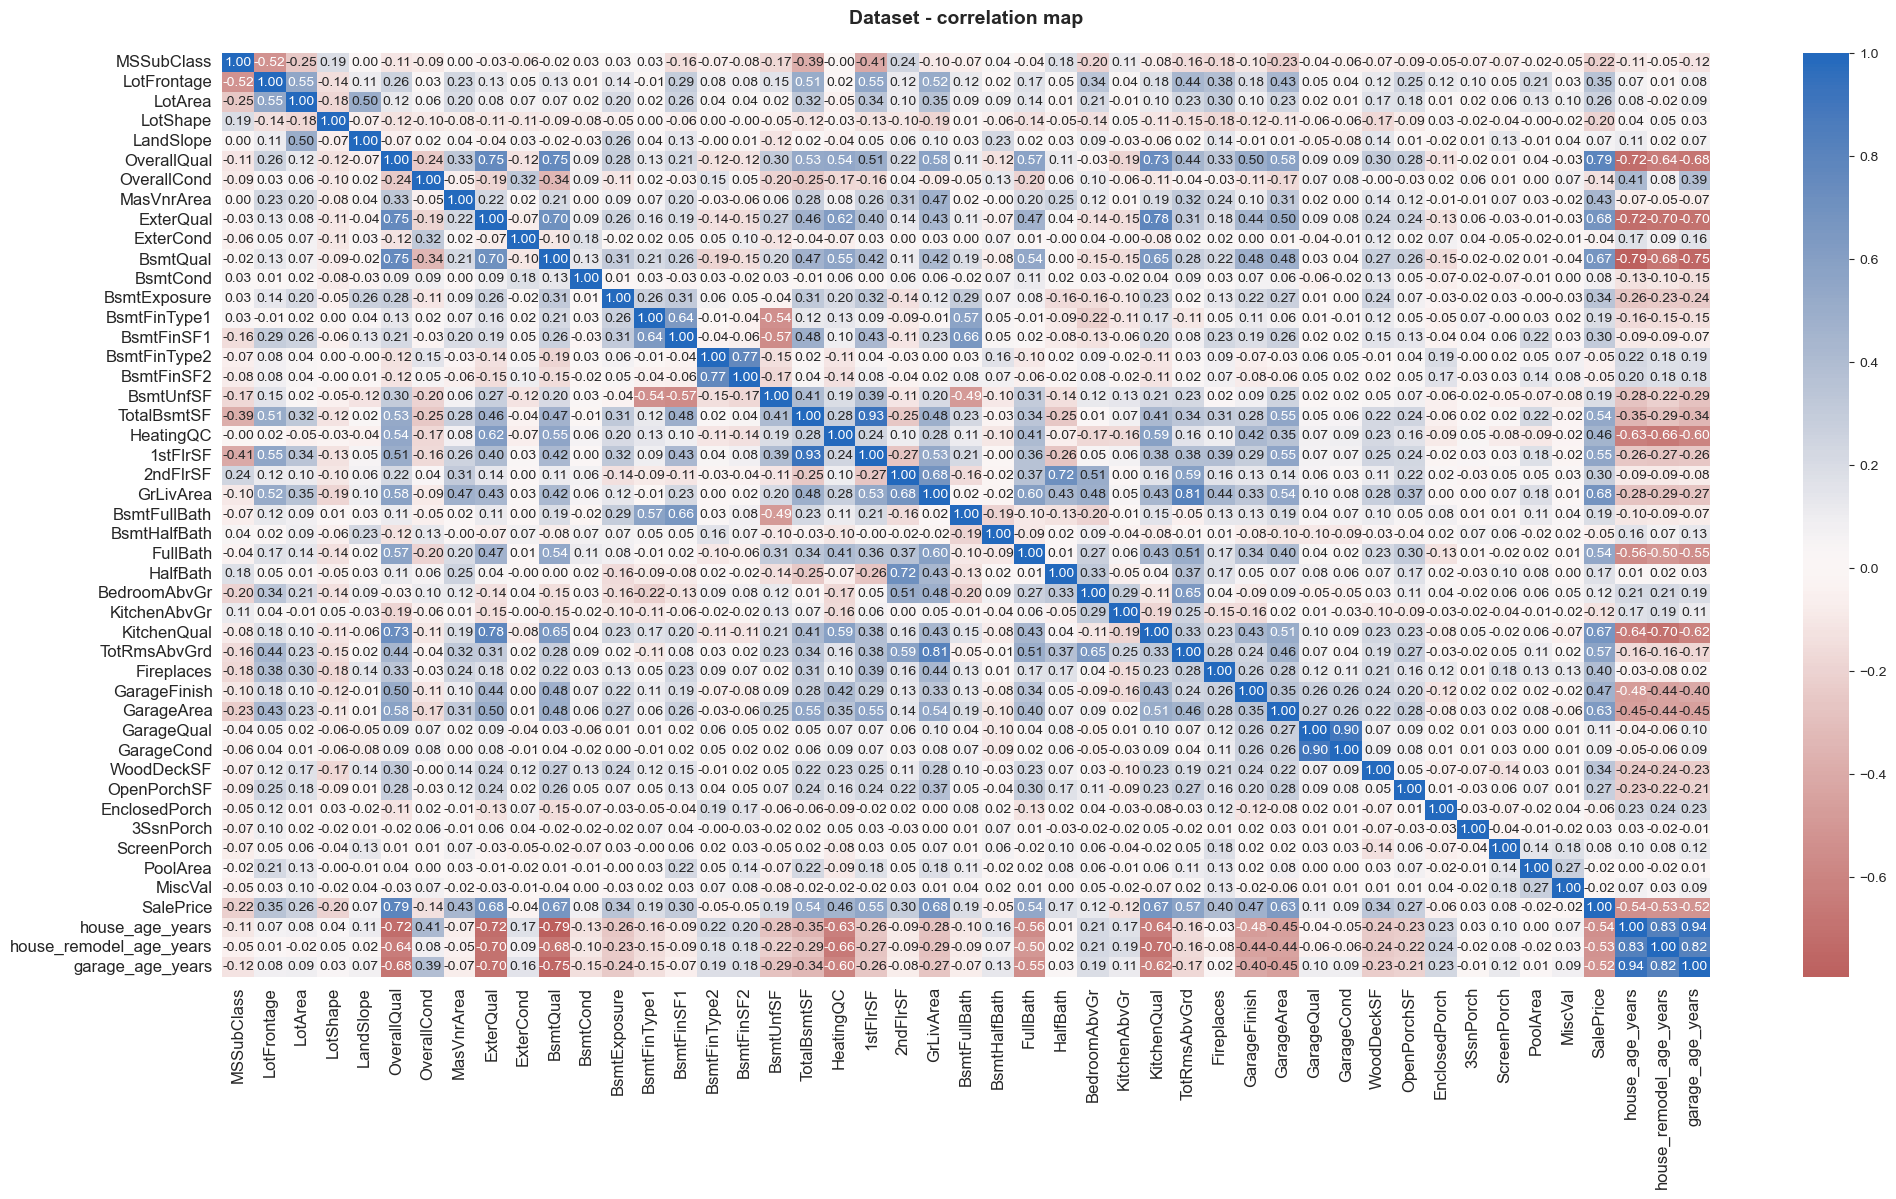

In [73]:
df_corr = df[num_cols].corr()

# correlation plot
plt.figure(figsize = [24, 12])
sb.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Dataset - correlation map\n', weight = 'bold', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Seaborn's pair plot

In [74]:
# # Pairplot
# g = sb.pairplot(df)
# g.fig.subplots_adjust(top=0.90)
# g.fig.suptitle('Dataset - numerical varibles Pairplot\n', fontsize = 16, weight = 'bold');

## Transformation

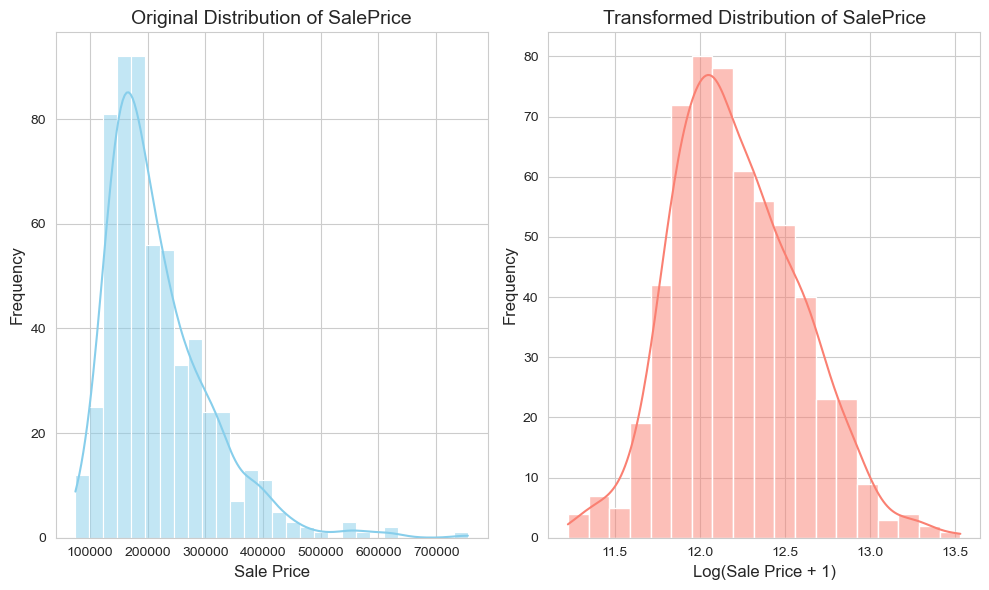

In [75]:
# Set up the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot the original distribution of SalePrice
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Original Distribution of SalePrice', fontsize=14)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Apply log transformation to SalePrice
df['SalePrice'] = np.log1p(df['SalePrice'])

# Plot the transformed distribution of SalePrice
plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice'], kde=True, color='salmon')
plt.title('Transformed Distribution of SalePrice', fontsize=14)
plt.xlabel('Log(Sale Price + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### Create dummy variables: 

In [76]:
# Setting drop_first=True to avoid multicollinearity issues
data = pd.get_dummies(df, drop_first=True)

# Display the shape and column names of the resulting DataFrame
print("Shape of dummy_data:", data.shape)
print("Columns of dummy_data:", data.columns)

Shape of dummy_data: (581, 162)
Columns of dummy_data: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=162)


## Model building and evaluation:

In [77]:
# Split the data into train and test sets
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=42)

In [78]:
# Scale the numerical features
numerical_cols = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64']]
print("Numerical columns:", numerical_cols)

Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'house_age_years', 'house_remodel_age_years', 'garage_age_years']


In [79]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [80]:
# Scale the numerical features for both train and test sets
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

Text(0.5, 1.0, 'Distribution of SalePrice in df_test')

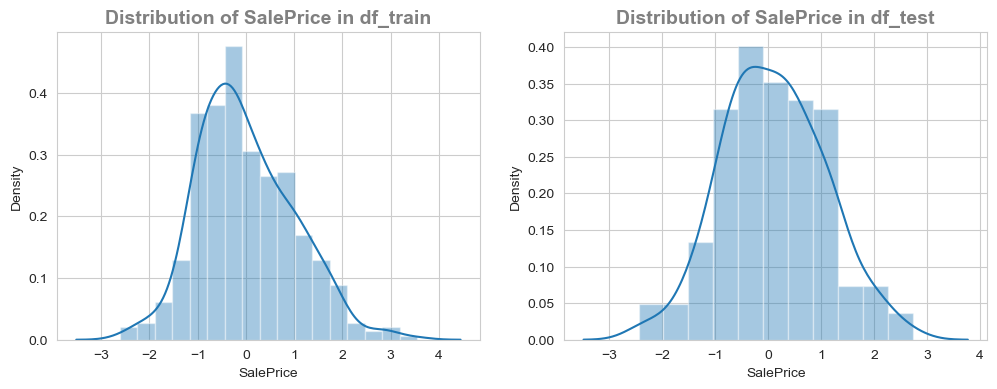

In [81]:
# Visualize the distribution of the target variable in train and test sets
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sb.distplot(df_train['SalePrice'])
plt.title('Distribution of SalePrice in df_train', weight='bold', color='grey', fontsize=14)

plt.subplot(1, 2, 2)
sb.distplot(df_test['SalePrice'])
plt.title('Distribution of SalePrice in df_test', weight='bold', color='grey', fontsize=14)

In [82]:
# Assign predictor and response variables
# Train data
X_train = df_train.drop(columns=['SalePrice'])  # Features
y_train = df_train['SalePrice']  # Target variable

# Test data
X_test = df_test.drop(columns=['SalePrice'])  # Features
y_test = df_test['SalePrice']  # Target variable

# Display the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (406, 161)
Shape of X_test: (175, 161)


## Model building using `Linear Regression` and `RFE` (Recursive Feature Elimination):

In [83]:
# Initialize and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
# Initialize RFE and select top 100 features
rfe = RFE(lm, n_features_to_select=100)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [85]:
# Create a DataFrame to store RFE scores
rfe_scores = pd.DataFrame({
    'Column_Names': X_train.columns,
    'Status': rfe.support_,
    'Rank': rfe.ranking_
})

In [86]:
# Filter the selected columns
rfe_sel_columns = rfe_scores[rfe_scores['Status']].Column_Names.tolist()

In [87]:
# Display the selected columns
print(f'Top {len(rfe_sel_columns)} columns:')
print('----------------')
print(rfe_sel_columns)

Top 100 columns:
----------------
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageArea', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_SLvl', 'RoofStyle_Gable', 

### Filter the `test` and `train` data using the `RFE` columns:

In [88]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lasso regression model:

In [89]:
# Initialize and fit the Lasso regression model
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

Lasso(alpha=0.001)

In [90]:
# Predictions on train and test data
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [91]:
# Calculate R2 score on train and test data
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print(f'R2 Score on train data: {train_r2_score}')
print(f'R2 Score on test data: {test_r2_score}')

R2 Score on train data: 0.9377653844868697
R2 Score on test data: 0.6714614103107912


In [92]:
# Extract model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(param, 3) for param in model_parameters]

# Create a DataFrame to display model parameters
parameter_df = pd.DataFrame(list(zip(['Constant'] + list(X_train.columns), model_parameters)), 
                             columns=['Variable', 'Coefficient'])

parameter_df

,Variable,Coefficient
0,Constant,-0.658
1,MSSubClass,-0.028
2,LotFrontage,0.051
3,LotArea,0.057
4,OverallQual,0.219
...,...,...
96,SaleType_WD,-0.000
97,SaleCondition_AdjLand,0.000
98,SaleCondition_Family,-0.371
99,SaleCondition_Normal,0.162


**Apply `GridSearchCV`, to improve the model with the optimal value of `alpha`:**

In [93]:
# Define the number of folds for cross-validation
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the hyperparameter grid
hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                          8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Initialize the Lasso regression model
lasso = Lasso()

# Setup GridSearchCV
lasso_grid = GridSearchCV(estimator=lasso,
                          param_grid=hyper_params,
                          scoring='r2',
                          cv=folds,
                          verbose=1,
                          return_train_score=True)

In [94]:
# Fit the GridSearchCV
lasso_grid.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [95]:
# Get the results of GridSearchCV
cv_results = pd.DataFrame(lasso_grid.cv_results_)

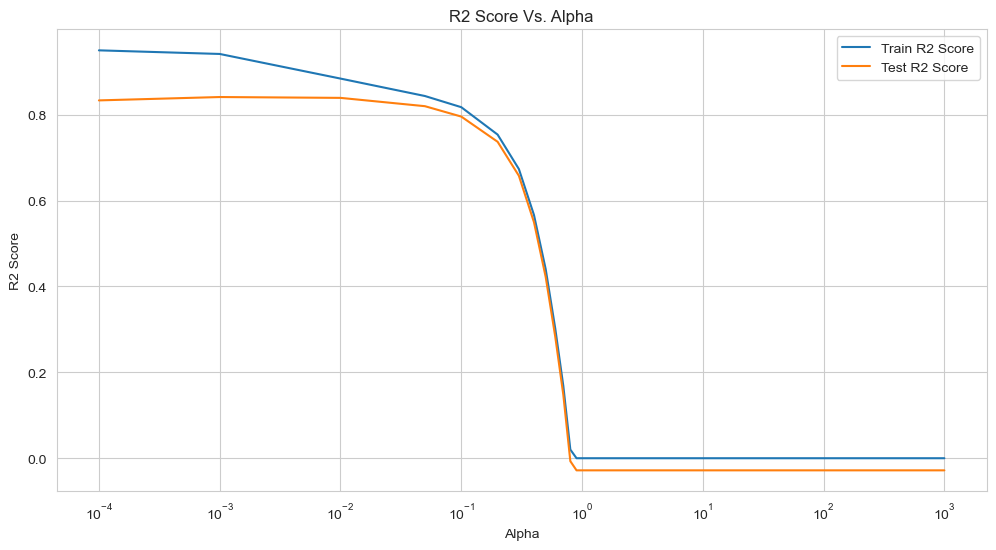

In [96]:
# Plot the R2 scores against alpha values
plt.figure(figsize=(12, 6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train R2 Score')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test R2 Score')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score Vs. Alpha')
plt.legend()
plt.show()

In [97]:
# Best alpha value
best_alpha = lasso_grid.best_params_['alpha']

# Build the Lasso regression model with the best alpha value
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

# R2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'R2 Score on train data: {train_r2}')
print(f'R2 Score on test data: {test_r2}')

R2 Score on train data: 0.9377653844868697
R2 Score on test data: 0.6714614103107912


In [98]:
# Model coefficients
lasso_coef = pd.DataFrame({'Feature': ['Constant'] + list(X_train.columns),
                           'Coefficient': [lasso_best.intercept_] + list(lasso_best.coef_)})

# Display top 10 features with highest coefficients
top_features = lasso_coef.sort_values(by='Coefficient', ascending=False).head(10)
print(top_features)

                   Feature  Coefficient
39    Neighborhood_StoneBr     0.537978
23         LandContour_HLS     0.479090
100  SaleCondition_Partial     0.308474
25         LandContour_Lvl     0.270683
36    Neighborhood_NoRidge     0.252403
30    Neighborhood_Crawfor     0.245710
37    Neighborhood_NridgHt     0.245565
4              OverallQual     0.219365
90          Functional_Typ     0.193963
16               GrLivArea     0.171487



**Lasso Regression:**
> + R2 Score on train data: 0.9377653844868697
> + R2 Score on test data: 0.6714614103107912

## Ridge Regression:

In [99]:
# Initialize and train the Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculate R2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print R2 scores
print(f'R2 Score on train data: {train_r2}')
print(f'R2 Score on test data: {test_r2}')

R2 Score on train data: 0.9467326249307954
R2 Score on test data: 0.6627685201981244


As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [100]:
# Define the number of folds for cross-validation
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the hyperparameter grid
hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                          0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                          8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Initialize the Ridge regression model
ridge = Ridge()

# Setup GridSearchCV
ridge_grid = GridSearchCV(estimator=ridge,
                          param_grid=hyper_params,
                          scoring='r2',
                          cv=folds,
                          verbose=1,
                          return_train_score=True)

# Fit the GridSearchCV
ridge_grid.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
# Get the results of GridSearchCV
cv_results = pd.DataFrame(ridge_grid.cv_results_)

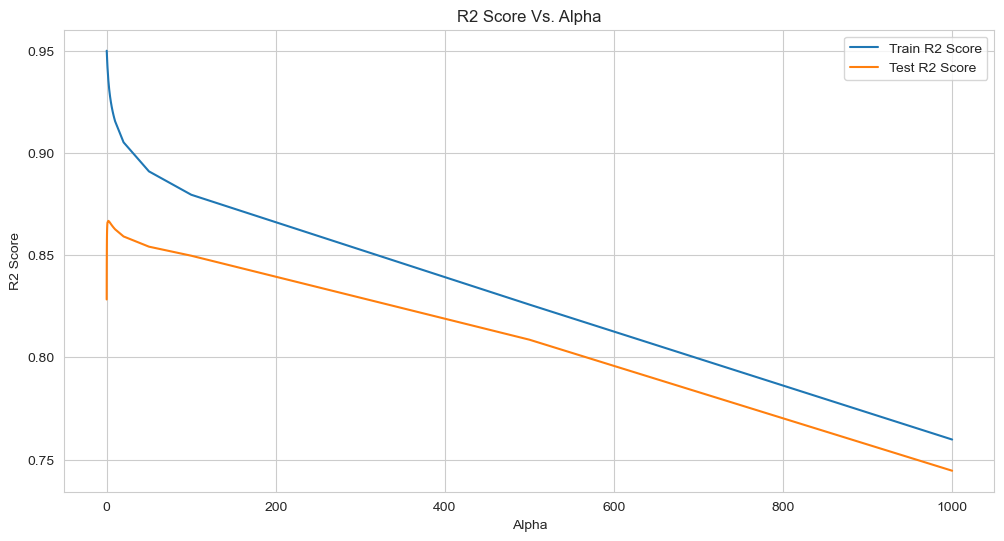

In [102]:
# Plot the R2 scores against alpha values
plt.figure(figsize=(12, 6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train R2 Score')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test R2 Score')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score Vs. Alpha')
plt.legend()
plt.show()

In [103]:
# Best alpha value
best_alpha = ridge_grid.best_params_['alpha']

In [104]:
# Build the Ridge regression model with the best alpha value
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

Ridge(alpha=2.0)

In [105]:
# Predictions
y_train_pred = ridge_best.predict(X_train)
y_test_pred = ridge_best.predict(X_test)

In [106]:
# R2 scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'R2 Score on train data: {train_r2}')
print(f'R2 Score on test data: {test_r2}')

R2 Score on train data: 0.9338241091398453
R2 Score on test data: 0.7128809458129317


In [107]:
# Model coefficients
ridge_coef = pd.DataFrame({'Feature': ['Constant'] + list(X_train.columns),
                           'Coefficient': [ridge_best.intercept_] + list(ridge_best.coef_)})

In [108]:
# Display top 10 features with highest coefficients
top_features = ridge_coef.sort_values(by='Coefficient', ascending=False).head(10)
print(top_features)

                   Feature  Coefficient
39    Neighborhood_StoneBr     0.503293
23         LandContour_HLS     0.437699
100  SaleCondition_Partial     0.292458
30    Neighborhood_Crawfor     0.286105
25         LandContour_Lvl     0.269058
36    Neighborhood_NoRidge     0.253920
37    Neighborhood_NridgHt     0.244890
4              OverallQual     0.212738
45         Condition1_RRAn     0.191748
90          Functional_Typ     0.175551


**Ridge Regression:**
> + R2 Score on train data: 0.9338241091398453
> + R2 Score on test data: 0.7128809458129317

## `Model selection`:

**Lasso Regression:**
> + R2 Score on train data: 0.9377653844868697
> + R2 Score on test data: 0.6714614103107912

**Ridge Regression:**
> + R2 Score on train data: 0.9338241091398453
> + R2 Score on test data: 0.7128809458129317h

> It is evident that the R2 scores are similar for both Lasso and Ridge regression. However, as Ridge Regression penalizes more on the dataset, in turn helping in more feature elimination, we will consider **Ridge Regression: model as the final model**.

In [109]:
# Initialize and train the Ridge Regression model
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train, y_train)

Ridge(alpha=2.0)

In [110]:
# Predictions on training and test data
y_train_pred_ridge = ridge_final.predict(X_train)
y_test_pred_ridge = ridge_final.predict(X_test)

In [111]:
# R2 scores
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f'R2 Score on train data (Ridge Regression): {train_r2_ridge}')
print(f'R2 Score on test data (Ridge Regression): {test_r2_ridge}')

R2 Score on train data (Ridge Regression): 0.9338241091398453
R2 Score on test data (Ridge Regression): 0.7128809458129317


In [112]:
# Model coefficients
ridge_coef_final = pd.DataFrame({'Feature': ['Constant'] + list(X_train.columns),
                                 'Coefficient': [ridge_final.intercept_] + list(ridge_final.coef_)})

In [113]:
# Display top 10 features with highest coefficients for Ridge Regression
top_features_ridge = ridge_coef_final.sort_values(by='Coefficient', ascending=False).head(10)
print(top_features_ridge)

                   Feature  Coefficient
39    Neighborhood_StoneBr     0.503293
23         LandContour_HLS     0.437699
100  SaleCondition_Partial     0.292458
30    Neighborhood_Crawfor     0.286105
25         LandContour_Lvl     0.269058
36    Neighborhood_NoRidge     0.253920
37    Neighborhood_NridgHt     0.244890
4              OverallQual     0.212738
45         Condition1_RRAn     0.191748
90          Functional_Typ     0.175551


These are the final features that should be selected for predicting the price of house, hence the equation:
```
Log(SalePrice) = C + 0.503293(Neighborhood_StoneBr) + 0.437699(LandContour_HLS) + 0.292458(SaleCondition_Partial) + 0.286105(Neighborhood_Crawfor) + 0.269058(LandContour_Lvl) + 0.253920(Neighborhood_NoRidge) + 0.244890(Neighborhood_NridgHt) + 0.212738(OverallQual) + 0.191748(Condition1_RRAn) + 0.175551(Functional_Typ) + Error term(RSS + alpha * (sum of absolute value of coefficients))
```
> Inference: Keep a check on these predictors affecting the price of the house.
> + The higher values of positive coeeficients suggest a high sale value.
> + The higher values of negative coeeficients suggest a decrease in sale value.
> + So, when the market value of the property is lower than the Predicted Sale Price, its the time to buy.

## Extra section for answering subjective questions:

### Question 1

+ 1.1. What is the optimal value of alpha for ridge and lasso regression? 
+ 1.2. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
+ 1.3. What will be the most important predictor variables after the change is implemented?

#### 1.1. What is the optimal value of alpha for ridge and lasso regression?

The optimal value of alpha for lasso regression is 0.001, and for ridge regression, it is 2.0.

#### 1.2. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

Increasing the value of alpha has different effects on Ridge and Lasso regression models:

**For Ridge Regression:**
Doubling the value of alpha in Ridge regression increases the penalty for large coefficients (L2 regularization). This stronger regularization effect leads to more shrinkage of coefficient values towards zero, reducing the complexity of the model. Consequently, the model becomes more parsimonious, with smaller coefficients for predictor variables.

**For Lasso Regression:**
Doubling the value of alpha in Lasso regression increases the penalty for non-zero coefficients (L1 regularization). This promotes sparsity in the coefficient matrix, forcing more coefficients to exactly zero. As a result, Lasso regression tends to perform feature selection, with many coefficients being zero. Consequently, doubling alpha in Lasso regression increases the level of feature sparsity, leading to a simpler model with fewer features.

Overall, both Ridge and Lasso regression models become more regularized and simpler with higher values of alpha, potentially preventing overfitting.

#### 1.3. What will be the most important predictor variables after the change is implemented?

After implementing the change (doubling the value of alpha), the most important predictor variables will likely be those that survive the increased regularization and remain significant in predicting the target variable.

**For Ridge Regression:**

The most important predictor variables will still be those with larger coefficients, albeit reduced in magnitude due to increased regularization. These variables will have a significant impact on the predicted outcome, even after the regularization penalty.

**For Lasso Regression:**

The most important predictor variables will be those with non-zero coefficients. Doubling the value of alpha in Lasso regression increases the penalty for non-zero coefficients, leading to more coefficients being pushed towards zero. However, variables that are highly correlated with the target variable and have strong predictive power will likely survive the regularization and retain non-zero coefficients.

In both cases, the most important predictor variables will be those that contribute the most to explaining the variability in the target variable while still surviving the regularization penalty imposed by the increased alpha value. It's essential to analyze the coefficients of the predictors after the change to identify the most important variables for predicting the outcome accurately.

**Lasso Regression:**

In [114]:
# Double the optimal value of alpha
0.001 * 2

0.002

In [115]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(f'R2 Score on train data: {r2_score(y_true=y_train,y_pred=y_train_pred)}')
print(f'R2 Score on test data: {r2_score(y_true=y_test,y_pred=y_test_pred)}')

R2 Score on train data: 0.9286900970955766
R2 Score on test data: 0.6684419258736064


In [116]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [117]:
lasso_df = lasso_coef.sort_values(by='Coef',ascending=False).head(10)
lasso_df

,Feature,Coef
39,3SsnPorch,0.475677
100,RoofStyle_Mansard,0.312491
23,BsmtFullBath,0.311667
4,LandSlope,0.240579
36,WoodDeckSF,0.229612
37,OpenPorchSF,0.218557
30,TotRmsAbvGrd,0.212856
90,BldgType_Duplex,0.202116
99,RoofStyle_Hip,0.171978
16,BsmtFinSF2,0.166462


In [118]:
lasso_imp_vars = lasso_df['Feature'].to_list()

print(f"The most important predictor variables after the change is: {lasso_imp_vars}")

The most important predictor variables after the change is: ['3SsnPorch', 'RoofStyle_Mansard', 'BsmtFullBath', 'LandSlope', 'WoodDeckSF', 'OpenPorchSF', 'TotRmsAbvGrd', 'BldgType_Duplex', 'RoofStyle_Hip', 'BsmtFinSF2']


**Ridge Regression:**

In [119]:
# Double the optimal value of alpha
2 * 2

4

In [120]:
ridge = Ridge(alpha = 4)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(f'R2 Score on train data: {r2_score(y_train,y_pred_train)}')

y_pred_test = ridge.predict(X_test)
print(f'R2 Score on test data: {r2_score(y_test,y_pred_test)}')

R2 Score on train data: 0.9262713342089209
R2 Score on test data: 0.7113888769494798


In [121]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [122]:
ridge_df = ridge_coef.sort_values(by='Coef',ascending=False).head(10)
ridge_df

,Feature,Coef
39,3SsnPorch,0.405021
23,BsmtFullBath,0.329262
100,RoofStyle_Mansard,0.253787
30,TotRmsAbvGrd,0.232955
36,WoodDeckSF,0.229998
4,LandSlope,0.218779
37,OpenPorchSF,0.215707
25,FullBath,0.178188
99,RoofStyle_Hip,0.162053
90,BldgType_Duplex,0.160752


In [123]:
ridge_imp_vars = ridge_df['Feature'].to_list()

print(f"The most important predictor variables after the change are: {ridge_imp_vars}")

The most important predictor variables after the change are: ['3SsnPorch', 'BsmtFullBath', 'RoofStyle_Mansard', 'TotRmsAbvGrd', 'WoodDeckSF', 'LandSlope', 'OpenPorchSF', 'FullBath', 'RoofStyle_Hip', 'BldgType_Duplex']


### Question 2

#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


After evaluating both Ridge and Lasso regression models and determining the optimal values of lambda for regularization, we can compare their performance metrics, such as R2 scores, to make a decision on which model to choose.

If we find that the R2 scores are similar for both Lasso and Ridge regression, it indicates that both models are performing comparably in terms of explaining the variance in the target variable. However, since Lasso regression penalizes more aggressively by forcing some coefficients to zero, it effectively performs feature selection and helps in reducing the complexity of the model.

Therefore, if the R2 scores are similar and there is a need for feature selection or a preference for a simpler model, we will choose Lasso Regression as the final model. This choice ensures that we prioritize model simplicity and interpretability while maintaining comparable predictive performance to Ridge Regression.

### Question 3

#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


After removing the five most important predictor variables in the Ridge model, the new top predictor variables are:

`Neighborhood_StoneBr`
`LandContour_HLS`
`SaleCondition_Partial`
`Neighborhood_Crawfor`
`LandContour_Lvl`

In [124]:
exclude_list = ['3SsnPorch', 'BsmtFullBath', 'RoofStyle_Mansard', 'TotRmsAbvGrd', 'WoodDeckSF']
selected_features = [col for col in X_train.columns if col not in exclude_list]

X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

# Build Ridge model with the new set of predictor variables
ridge = Ridge(alpha=2.0)
ridge.fit(X_train_new, y_train)

# Predictions
y_train_pred = ridge.predict(X_train_new)
y_test_pred = ridge.predict(X_test_new)

# Evaluate model performance
train_r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
test_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)

print(f'R2 Score on train data: {train_r2}')
print(f'R2 Score on test data: {test_r2}')

# Extract coefficients and top predictor variables
coef_values = np.insert(ridge.coef_, 0, ridge.intercept_)
ridge_coef = pd.DataFrame({'Feature': ['const'] + selected_features, 'Coef': coef_values})
ridge_coef_sorted = ridge_coef.sort_values(by='Coef', ascending=False).head(10)

# Extract the top predictor variables
ridge_top_vars_new = ridge_coef_sorted['Feature'].to_list()

print(f"The most important predictor variables after removing the five most important predictor variables in the Ridge model are: {ridge_top_vars_new}")

R2 Score on train data: 0.9329488068705222
R2 Score on test data: 0.7044985529963501
The most important predictor variables after removing the five most important predictor variables in the Ridge model are: ['Neighborhood_StoneBr', 'LandContour_HLS', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'LandContour_Lvl', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'OverallQual', 'Condition1_RRAn', 'Functional_Typ']


### Question 4

#### How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

To ensure that a model is robust and generalizable, several key considerations should be taken into account:

1. **Simplicity of the Model**: A simpler model tends to be more robust and generalizable. While complexity might enhance accuracy on the training data, it often leads to overfitting and poor performance on unseen data. Therefore, prioritizing simplicity, even at the cost of some accuracy, can enhance the model's generalizability.

2. **Bias-Variance Trade-off**: This concept underscores the trade-off between bias and variance in model performance. A model with high bias and low variance (e.g., a simple model) is more likely to generalize well to unseen data. Conversely, a model with low bias and high variance (e.g., a complex model) might perform well on training data but could struggle with generalization.

3. **Consistent Performance Across Datasets**: A robust model should demonstrate consistent performance across different datasets, including both training and test datasets. Minimal deviation in accuracy between these datasets indicates that the model's performance is stable and not overly influenced by the specific characteristics of the training data.

#### Implications of Prioritizing Model Robustness and Generalizability

- **Stable Performance**: A robust model is less likely to be affected by outliers, noise, or specific characteristics of the training data. It can maintain stable performance across diverse datasets, leading to more reliable predictions in real-world scenarios.

- **Reduced Overfitting**: By favoring simplicity and avoiding excessive complexity, the risk of overfitting is mitigated. Overfitting occurs when a model captures noise or idiosyncrasies in the training data, leading to poor generalization. Prioritizing robustness helps minimize this risk.

- **Enhanced Interpretability**: Simpler models are often more interpretable, making it easier to understand the underlying patterns and relationships in the data. This interpretability can be valuable for stakeholders who need to trust and comprehend the model's predictions.

In summary, while prioritizing raw accuracy might lead to impressive performance on training data, it does not guarantee robustness or generalizability. By focusing on simplicity, stability, and consistent performance across datasets, a model can become more reliable and suitable for real-world applications.

## Credits:

> + Souhardya Biswas
> + souhardyabiswas02@gmail.com